In [20]:
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot
import numpy as np

In [21]:
DATA_PATH = "/home/mathuis/Development/cyber_wolf/data"
HL_SIZE = 13

In [22]:
def load_data(path: str):
    print("Loading data")
    return np.load(path, allow_pickle=True)


def build_model():
    print("Building model")
    
    input_layer = layers.Input(shape=(98,))
    encoded = layers.Dense(HL_SIZE, activation="relu")(input_layer)
    decoded = layers.Dense(98, activation="relu")(encoded)

    model = keras.Model(input_layer, decoded)    

    return model

def train_model(model, x_train, x_test):
    print("Compiling model")
    model.compile(optimizer="adam", loss="msle", metrics=["mse", "msle", "mae", "mape", "cosine_similarity"])
    print("Training model")
    return model.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test))


def plot(history):
    print(history.keys())

    for key in history.keys():
        if not key.startswith("val_"):
            pyplot.plot()

            pyplot.title(key)
            pyplot.plot(history[key], label="train")
            pyplot.plot(history[f"val_{key}"], label="test")
            pyplot.xlabel("Epoch")
            pyplot.ylabel(key)
            pyplot.legend()

            pyplot.show()

def evaluate_model(model, x_test):
    results = model.evaluate(x_test, x_test)
    print(f"Test Loss: {results}")

In [23]:
x_train = load_data(f"{DATA_PATH}/datasets/x_train.npy")
x_test = load_data(f"{DATA_PATH}/datasets/x_test.npy")
    

Loading data
Loading data


In [24]:
model = build_model()
model.summary()

Building model
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 98)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 13)                1287      
_________________________________________________________________
dense_5 (Dense)              (None, 98)                1372      
Total params: 2,659
Trainable params: 2,659
Non-trainable params: 0
_________________________________________________________________


In [25]:
res = train_model(model, x_train, x_test)

Compiling model
Training model
Epoch 1/10
302/302 [==============================] - 3s 6ms/step - loss: 0.1391 - mse: 19.3626 - msle: 0.1391 - mae: 0.4566 - mape: 81578911.0099 - cosine_similarity: 0.5688 - val_loss: 0.0643 - val_mse: 9.6391 - val_msle: 0.0643 - val_mae: 0.2842 - val_mape: 20319878.0000 - val_cosine_similarity: 0.9385
Epoch 2/10
302/302 [==============================] - 1s 5ms/step - loss: 0.0612 - mse: 8.0955 - msle: 0.0612 - mae: 0.2614 - mape: 17619092.6568 - cosine_similarity: 0.9411 - val_loss: 0.0553 - val_mse: 5.0924 - val_msle: 0.0553 - val_mae: 0.2133 - val_mape: 14304373.0000 - val_cosine_similarity: 0.9452
Epoch 3/10
302/302 [==============================] - 1s 5ms/step - loss: 0.0551 - mse: 4.9218 - msle: 0.0551 - mae: 0.2086 - mape: 12057002.0990 - cosine_similarity: 0.9469 - val_loss: 0.0509 - val_mse: 3.7448 - val_msle: 0.0509 - val_mae: 0.1834 - val_mape: 8604718.0000 - val_cosine_similarity: 0.9549
Epoch 4/10
302/302 [==============================]

dict_keys(['loss', 'mse', 'msle', 'mae', 'mape', 'cosine_similarity', 'val_loss', 'val_mse', 'val_msle', 'val_mae', 'val_mape', 'val_cosine_similarity'])


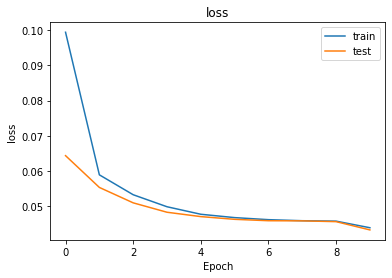

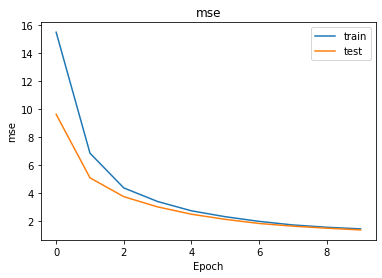

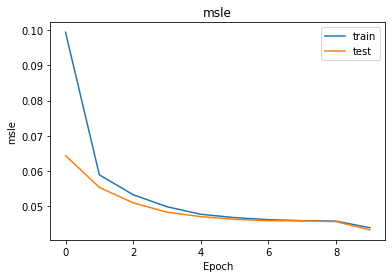

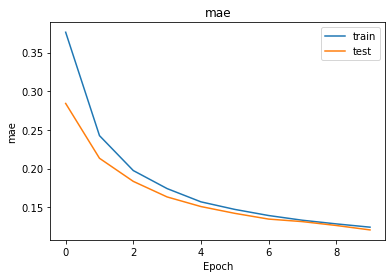

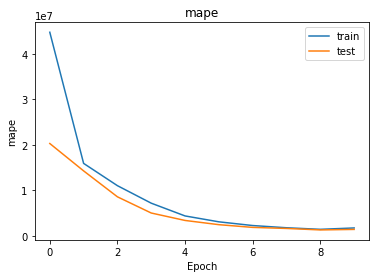

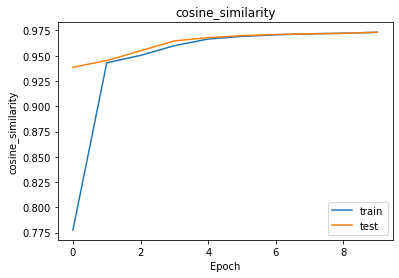

In [26]:
# print(res.history.keys())
plot(res.history)

In [27]:
evaluate_model(model, x_test[:1])

1/1 [==============================] - 0s 77ms/step - loss: 0.0607 - mse: 0.2693 - msle: 0.0607 - mae: 0.1621 - mape: 1471933.3750 - cosine_similarity: 0.9903
Test Loss: [0.06069383770227432, 0.26934367418289185, 0.06069383770227432, 0.16213275492191315, 1471933.375, 0.9903067946434021]


In [28]:
pred = model.predict(x_test)
print(x_test[0])
print(pred[0])

[ 0.  1.  0. 33.  2.  0.  2.  2.  2.  1.  0.  0.  2.  0.  0.  2.  1.  2.
  3.  2.  0.  2.  0.  1.  1.  0.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.          0.86991274  0.         30.827225    0.          0.
  1.869009    2.303664    2.7994883   0.          0.          0.
  2.0160587   0.          0.          0.          1.0628873   2.3629951
  3.569003    1.6035966   0.          1.684629    0.          0.94322705
  0.          0.          0.          0.9823084   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 

In [30]:
# model.save(f"{DATA_PATH}/models/1h-13n-10e-b32-notnorm-model.h5")